# Binaural Processing

In [63]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Audio
import ipywidgets as widgets
from ipywidgets import interact
import time
from math import pi, sqrt
from numpy import cos, sin
import soundfile as sf

# Panning

-0.00054108317


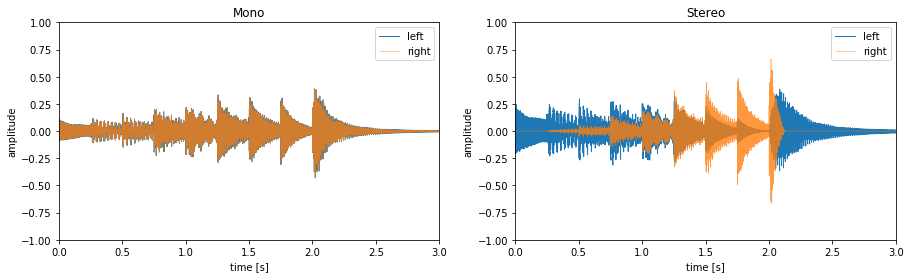

In [76]:
filePath = r'./audio/marimba_c3_maj7_stereo.wav'
clipStereo, clipRate = librosa.load(filePath, mono=False) # stereo file

filePath = r'./audio/marimba_c3_maj7_mono.wav'
clipMono, clipRate = librosa.load(filePath, mono=True) # mono file

print(clipMono[0])

fig, ax = plt.subplots(1, 2, figsize=(15,4))
t = np.arange(0, len(clipStereo[0])) * (1/clipRate)

ax[0].plot(t, clipMono, lw = 1)
ax[0].plot(t, clipMono, lw = .5, alpha=0.8)
ax[0].legend(['left', 'right'], loc='upper right')
ax[0].set_title('Mono')
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('amplitude')
ax[0].axis([0, 3, -1, 1])

ax[1].plot(t, clipStereo[0], lw = 1)
ax[1].plot(t, clipStereo[1], lw = .5, alpha=0.8)
ax[1].legend(['left', 'right'], loc='upper right')
ax[1].set_title('Stereo')
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('amplitude')
ax[1].axis([0, 3, -1, 1])

fig.savefig('c3_maj7_monoVsStereo.svg', format='svg')

## Stereo Music Clip

Text(0.5, 1.0, 'Mono')

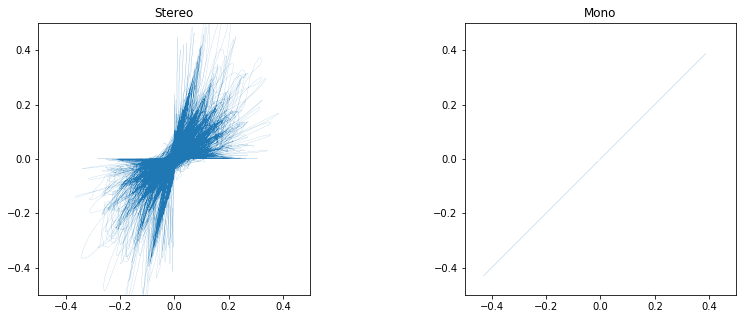

In [3]:
IPython.display.display(Audio(data=clipStereo, rate=clipRate, autoplay=True))
IPython.display.display(Audio(data=clipMono, rate=clipRate))

fig, axs = plt.subplots(1, 2, figsize=(14,5))

axs[0].plot(clipStereo[0], clipStereo[1], lw=.1)
axs[0].set_xlim(-0.5, 0.5)
axs[0].set_ylim(-0.5, 0.5)
axs[0].set_aspect('equal', 'box')
axs[0].set_title('Stereo')

axs[1].plot(clipMono, clipMono, lw=.1)
axs[1].set_aspect('equal', 'box')
axs[1].set_xlim(-0.5, 0.5)
axs[1].set_ylim(-0.5, 0.5)
axs[1].set_title('Mono')

# Time delay example

In [4]:
# load mono piano chord
filePath = r'./audio/piano_c3_maj7_mono.wav'
clipMono, clipRate = librosa.load(filePath, mono=True) # stereo file
T = float(1/clipRate)
print('T = {}us'.format(T * 1e6))

T = 45.35147392290249us


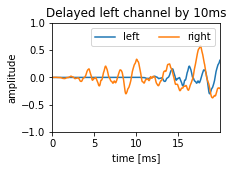

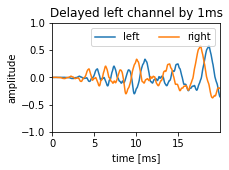

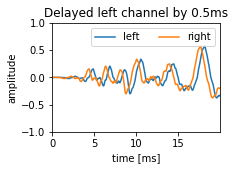

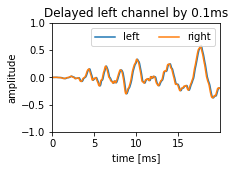

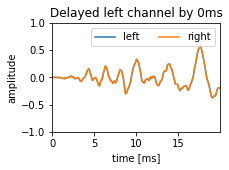

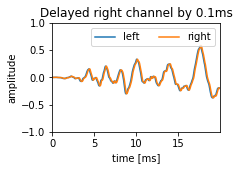

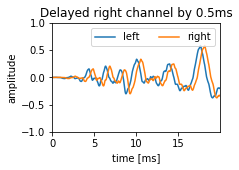

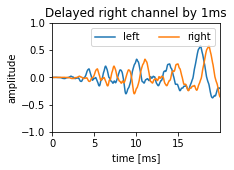

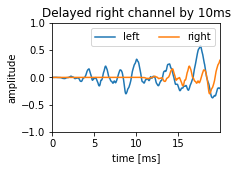

In [75]:
# pad with 0s for adding phase delay
                        
PLOT_DUR_MS = 20
tSamples_ms = np.arange(0, PLOT_DUR_MS, T*1000)
plotTimeLen = len(tSamples_ms)

for delay_ms in [-10, -1, -.5, -.1, 0, 0.1, .5, 1, 10]:
    delayRightBy = clipRate*abs(delay_ms)/1000 # use an even number here

    zeroPad = [0]*int(delayRightBy) # half pad on left, half on right

    if delay_ms > 0: 
        # left comes first
        refL = list(clipMono)
        refL.extend(zeroPad)

        # delay right
        movR = list(zeroPad)
        movR.extend(clipMono)

    else:
        # right comes first
        movR = list(clipMono)
        movR.extend(zeroPad)

        # delay left
        refL = list(zeroPad)
        refL.extend(clipMono)
 
    fig, ax = plt.subplots(figsize=(3,2))
    ax.plot(tSamples_ms, refL[:plotTimeLen], \
             tSamples_ms, movR[:plotTimeLen])

    ax.set_xlim([0, tSamples_ms[-1]])
    ax.set_ylim([-1,1])
    ax.legend(['left', 'right'], loc='upper right', ncol=2)
    if delay_ms > 0:
        titleStr = 'Delayed right channel by {}ms'.format(delay_ms)
    else:
        titleStr = 'Delayed left channel by {}ms'.format(abs(delay_ms))                             
    ax.set_title(titleStr)
    ax.set_xlabel('time [ms]')
    ax.set_ylabel('amplitude')
                  
    formatOut = 'svg'
    #print('delayed right by {}ms'.format(delay_ms))
    fig.savefig(titleStr + '.' + formatOut, format=formatOut)
    
    clipStereo = np.asfortranarray([refL, movR])
    #IPython.display.display(Audio(data=clipStereo, rate=clipRate, autoplay=True))
    
    outPath = r'piano_c3_maj7_mono_{}.wav'.format(delay_ms)
    librosa.output.write_wav(path=outPath, y=clipStereo, sr=clipRate, norm=True)
    #sf.write(outPath, clipStereo, clipRate)

In [6]:
PLOT_DUR_MS = 20
tSamples_ms = np.arange(0, PLOT_DUR_MS, T*1000)
plotTimeLen = len(tSamples_ms)

#---------------------------------------------------------------------#
# run this whenever user updates delay input
#---------------------------------------------------------------------#

def user_inputs(delay_ms):
    # delay right channel wrt left by delay_ms by zero padding
    
    delayRightBy = clipRate*abs(delay_ms)/1000 # use an even number here

    zeroPad = [0]*int(delayRightBy) # half pad on left, half on right
    print('delayed left channel by {}ms'.format(delay_ms))

    if delay_ms < 0: 
        # left comes first
        refL = list(clipMono)
        refL.extend(zeroPad)

        # delay right
        movR = list(zeroPad)
        movR.extend(clipMono)

    else:
        # right comes first
        movR = list(clipMono)
        movR.extend(zeroPad)

        # delay left
        refL = list(zeroPad)
        refL.extend(clipMono)
    
    plt.plot(tSamples_ms, refL[:plotTimeLen], \
             tSamples_ms, movR[:plotTimeLen])
    #lineL.set_data(tSamples_ms, refL[:plotTimeLen])
    #lineR.set_data(tSamples_ms, movR[:plotTimeLen])
    
    # playback the phase-delayed clip
    clipStereo = np.asfortranarray([refL, movR])
    IPython.display.display(Audio(data=clipStereo, rate=clipRate, autoplay=not True))

In [7]:
interact(user_inputs, delay_ms = widgets.FloatSlider(value=0, \
                                               min=-PLOT_DUR_MS/2, max=PLOT_DUR_MS/2, step=.5, \
                                               continuous_update=False)) # only run on mouse release

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='delay_ms', max=10.0, min=-1…

<function __main__.user_inputs(delay_ms)>

In [8]:
# https://stackoverflow.com/questions/33048353/more-than-one-audio-object-in-a-jupyter-ipython-notebook-cell

'''
DURATION_S = []
if DURATION_S:
    novBurst, novBurstRate = librosa.load(filePath, mono=False, duration=DURATION_S) # stereo file
else:
    novBurst, novBurstRate = librosa.load(filePath, mono=False) # stereo file
#print(x, sr)
mid   = 0.5*x[0]
side  = x[1]
left  =  side +mid
right = -side +mid
x_stereo = np.asfortranarray([left, right])

#t = np.arange(0, len(mid)) * (1/sr)
#plt.plot(t, mid, t, side)
#plt.legend(['mid', 'side'])
#librosa.display.waveplot(x, sr=sr) # left is above, right is below the axis
'''

"\nDURATION_S = []\nif DURATION_S:\n    novBurst, novBurstRate = librosa.load(filePath, mono=False, duration=DURATION_S) # stereo file\nelse:\n    novBurst, novBurstRate = librosa.load(filePath, mono=False) # stereo file\n#print(x, sr)\nmid   = 0.5*x[0]\nside  = x[1]\nleft  =  side +mid\nright = -side +mid\nx_stereo = np.asfortranarray([left, right])\n\n#t = np.arange(0, len(mid)) * (1/sr)\n#plt.plot(t, mid, t, side)\n#plt.legend(['mid', 'side'])\n#librosa.display.waveplot(x, sr=sr) # left is above, right is below the axis\n"

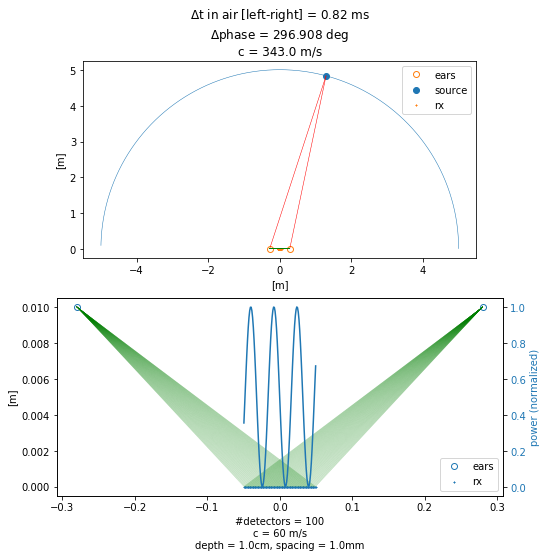

In [60]:
SRC_THETA_deg = 75 # 90 is center
R = 5 #m, radial distance of sound source from middle of head
SRC_FREQ_Hz = 1e3 # Hz

NUM_RX = 100 # use even number
EAR_Y = .01 # m, this is really vertical depth of Rx
RX_STEP_x = 0.001 # m, spacing

c = 343 # m/s
c_auditory = 60 # m/s, that is, roughly 200 ft/s, range seems to be 3.25 to 395 feet/sec, from: 
# http://www.hitl.washington.edu/projects/knowledge_base/virtual-worlds/EVE/III.A.2.Auditory.html
HEAD_WIDTH = 56e-2 # m, https://www.quora.com/What-is-the-average-width-of-a-human-head

thetaRad = SRC_THETA_deg * pi/180
src_x = R*cos(thetaRad)
src_y = R*sin(thetaRad) + EAR_Y

earL_x = -HEAD_WIDTH/2
earL_y = EAR_Y
earR_x = +HEAD_WIDTH/2
earR_y = EAR_Y

# Use right ear as reference, get ETA difference
path_SmL = sqrt((src_x - earL_x)**2 + (src_y - earL_y)) # source -left ear
path_SmR = sqrt((src_x - earR_x)**2 + (src_y - earR_y)) # source -right ear
pathDiff_air = path_SmL - path_SmR
timeDiff_air = pathDiff_air/c # between incoming sound at both ears
phaseDiff_deg = 360*timeDiff_air/float(1/SRC_FREQ_Hz) # degrees

# Consider coincidence Rx being a linear array
rx_x  = np.arange(0, NUM_RX, 1)*RX_STEP_x
rx_x -= RX_STEP_x * (NUM_RX-1)/2 # center
rx_y = [0]*NUM_RX

# Calculate power at each rx
rx_phases_rad = np.array([phaseDiff_deg]*NUM_RX)
for ndx in range(NUM_RX):
    path_earLmRx = sqrt((earL_x -rx_x[ndx])**2 + (earL_y -rx_y[ndx])) # left ear -rx
    path_earRmRx = sqrt((earR_x -rx_x[ndx])**2 + (earR_y -rx_y[ndx])) # right ear -rx
    pathDiff_nuc = path_earLmRx - path_earRmRx
    timeDiff_nuc = pathDiff_nuc/c_auditory
    rx_phases_rad[ndx] += (2*pi)*timeDiff_nuc/float(1/SRC_FREQ_Hz) # 2pi * deltaT/period
    
rx_amp = [1 + cos(rx_phases_rad), 0 + sin(rx_phases_rad)] # just adding unit vectors with phase angle
rx_pow = rx_amp[0]**2 + rx_amp[1]**2
rx_pow /= max(rx_pow) # normalize

# Plots galore!
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].set_aspect('equal', 'box')

# Draw source
axs[0].scatter(x=src_x, y=src_y, label='source')

# Draw circle of radius R
srcCircle_theta = np.arange(0, pi, pi/180)
srcCircle_x = R*cos(srcCircle_theta)
srcCircle_y = R*sin(srcCircle_theta) + EAR_Y
axs[0].plot(srcCircle_x, srcCircle_y, lw = .5)

for ax in axs:
    # Draw ears
    ax.plot([earL_x, earR_x], [earL_y, earR_y], \
            label='ears', marker = 'o', fillstyle='none', lw=0)

    # Draw receivers
    ax.scatter(x=rx_x, y=rx_y, 
               label='rx', marker='x', s=1) # s is marker size

# Draw lines connecting source to ears
axs[0].plot([earL_x, src_x], [earL_y, src_y], [earR_x, src_x], [earR_y, src_y], color='r', lw=.5)

# Draw lines connecting each rx to each ear
for ndx in range(NUM_RX):
    axs[0].plot([rx_x[ndx], earL_x], [rx_y[ndx], earL_y], \
                [rx_x[ndx], earR_x], [rx_y[ndx], earR_y], color='g', lw=.1)
    axs[1].plot([rx_x[ndx], earL_x], [rx_y[ndx], earL_y], \
                [rx_x[ndx], earR_x], [rx_y[ndx], earR_y], color='g', lw=.1)

# Draw rx powers
axRx = axs[1].twinx()
axRx.plot(rx_x, rx_pow)
axRx.tick_params(axis='y', labelcolor='#1f77b4')
axRx.set_ylabel('power (normalized)', color='#1f77b4')

# Formatting
titleStr  =  '$\Delta$t in air [left-right] = {:.2} ms'.format(timeDiff_air*1e3)
titleStr +='\n$\Delta$phase = {:3.3f} deg'.format(phaseDiff_deg)
titleStr +='\nc = {:3.1f} m/s'.format(c)

axs[0].set_title(titleStr)
axs[0].set_xlabel('[m]')
axs[0].set_ylabel('[m]')
axs[0].legend(loc='upper right') # use inline labels

titleStr = '#detectors = {}'.format(NUM_RX)
titleStr+= '\nc = {} m/s'.format(c_auditory)
titleStr+= '\ndepth = {}cm, spacing = {}mm'.format(EAR_Y*100, RX_STEP_x*1000)
#axs[1].set_title(titleStr)
axs[1].set_ylabel('[m]')
axs[1].set_xlabel(titleStr)
axs[1].legend(loc='lower right')

fileName = 'srcAngle{}deg_numRx{}_depth{}_spacing{}'.format(SRC_THETA_deg, \
                                                            NUM_RX, SRC_THETA_deg, \
                                                            EAR_Y, RX_STEP_x)
formatOut = 'svg'
fig.savefig(fileName + '.' + formatOut, format=formatOut)